In [69]:
%matplotlib inline

from utils import *

In [70]:
Traf     = pandas.concat(map( lambda name : pandas.read_hdf(
           name,
    key  = 'table')
           ,H5('traffic')
           )).query(boundaryQ).reset_index(drop=True)

In [3]:
lLobj    =  ['pickup_latitude','pickup_longitude']
Traf     = Traf.round({x:1 for x in lLobj}).groupby(
            lLobj
            ).key.sum().to_frame().assign(
 traffic = lambda DF : (DF.key-DF.key.min())/(DF.key.max()-DF.key.min())
            ).reset_index().rename(
 columns = {'key':'traffic_count'}).assign(
  geokey = lambda DF : DF.pickup_latitude.astype(str)+DF.pickup_longitude.astype(str)
            ).drop(lLobj,axis=1)


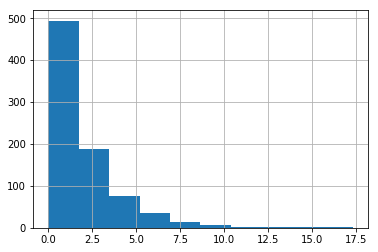

In [4]:
Traf.traffic_count.apply(pandas.np.log).hist()

In [30]:
traffic_summary = pandas.read_csv('./data/us.csv').query('state_id=="NY"'
                                      ).drop_duplicates('zips').round(
    {'lat':1,'lng':1}).groupby(['lat','lng']).sum().reset_index().assign(
    
               geokey = lambda DF : DF.lat.astype(str)+DF.lng.astype(str)
    ).merge(
    
    Traf,
    
    how='left', on = 'geokey')

traffic_summary.to_hdf(
            path('','traffic_summary.h5'),
       key='table',
     index=None)

traffic_summary.head()

,lat,lng,county_fips,population,population_proper,density,incorporated,id,geokey,traffic_count,traffic
0,40.6,-74.1,36085,476015.0,476015.0,3155.0,1.0,1840034032,40.6-74.1,2708.0,8.359698e-05
1,40.6,-73.8,36059,0.0,0.0,3391.2,0.0,1840005267,40.6-73.8,816196.0,2.520555e-02
2,40.6,-73.7,432708,59782.0,59782.0,32876.7,7.0,22080087973,40.6-73.7,1209.0,3.730519e-05
3,40.6,-73.6,108177,0.0,0.0,5268.0,0.0,5520015768,40.6-73.6,380.0,1.170419e-05
4,40.6,-73.3,36103,0.0,0.0,267.1,0.0,1840024182,40.6-73.3,26.0,7.720445e-07
